# Book Recommender System

Book-Crossings is a book ratings dataset compiled by Cai-Nicolas Ziegler. It contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

The data consists of three tables: ratings, books info, and users info.

# Acquiring Data

In [0]:
!wget -O BX-CSV_Dump.zip http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
!unzip -o BX-CSV_Dump.zip -d data

--2018-10-16 04:52:50--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV_Dump.zip’

BX-CSV_Dump.zip     100%[===================>]  24.88M  10.1MB/s    in 2.5s    

2018-10-16 04:52:53 (10.1 MB/s) - ‘BX-CSV_Dump.zip’ saved [26085508/26085508]

Archive:  BX-CSV_Dump.zip
  inflating: data/BX-Book-Ratings.csv  
  inflating: data/BX-Books.csv       
  inflating: data/BX-Users.csv       


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
books = pd.read_csv('data/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('data/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

# Analyzing Data

**Ratings Dataset**
The ratings data set provides a list of ratings that users have given to books. It includes 1,149,780 records and 3 fields: userID, ISBN, and bookRating.

In [0]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [0]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


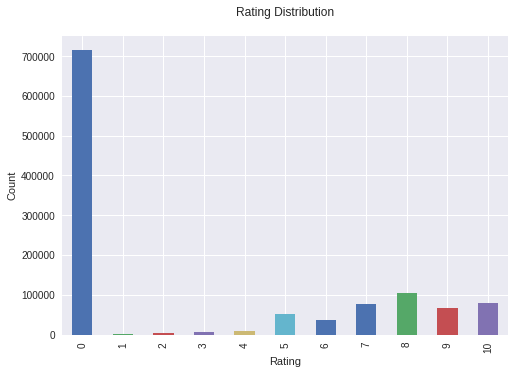

In [0]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Books Data**
The books data set provides book details. It includes 271,360 records and 8 fields: ISBN, book title, book author, publisher and so on.

In [0]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [0]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


**Users Data** This dataset provides the user demographic information. It includes 278,858 records and 3 fields: user id, location and age.

In [0]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


In [0]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


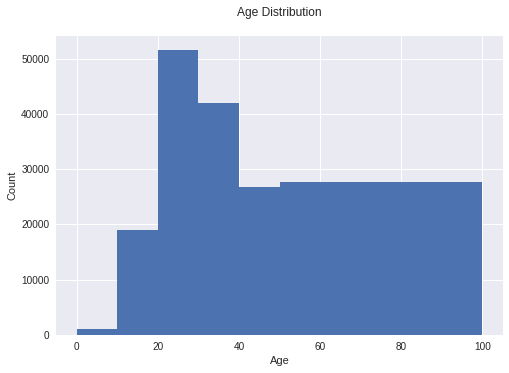

In [0]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Recommendation Models

#  Recommendations based on rating counts

In [0]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [0]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


This gives us the top 5 rated books. Based on user ratings books can be recommended to the users. If some user likes Wild Animus, the the recommender system suggests that we can recommend 'The Lovely Bones' to the same user. 

# Recommendations based on correlations

**Recommendations based on correlations**

We use Pearsons’R correlation coefficient to measure linear correlation between two variables, in our case, the ratings for two books.

Find out the average rating and the number of ratings each book received

In [0]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


**Observation**
In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [0]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

**Rating matrix**

We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [0]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find out which books are correlated with the 2nd most rated book “The Lovely Bones: A Novel”.

In [0]:
bones_ratings = ratings_pivot['0385504209']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,pearsonR,ratingCount
ISBN,,
0385504209,1.000000,883
044651652X,0.524773,368
044022165X,0.434780,386
006101351X,0.368629,364
0312278586,0.367703,474
0440222656,0.350079,420
0060987103,0.349445,326
0439064872,0.346980,351
0671021001,0.329035,468


Find out the names of the books

In [0]:
books_corr_to_bones = pd.DataFrame(['0385504209', '044651652X', '044022165X', '006101351X', '0312278586', '0440222656', '0060987103', '0439064872', '0671021001'], 
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1,044651652X,The Bridges of Madison County,Robert James Waller,1992,Warner Books,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...,http://images.amazon.com/images/P/044651652X.0...
2,044022165X,The Rainmaker,JOHN GRISHAM,1996,Dell,http://images.amazon.com/images/P/044022165X.0...,http://images.amazon.com/images/P/044022165X.0...,http://images.amazon.com/images/P/044022165X.0...
3,006101351X,The Perfect Storm : A True Story of Men Agains...,Sebastian Junger,1998,HarperTorch,http://images.amazon.com/images/P/006101351X.0...,http://images.amazon.com/images/P/006101351X.0...,http://images.amazon.com/images/P/006101351X.0...
4,0312278586,The Nanny Diaries: A Novel,Emma McLaughlin,2002,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...
5,0440222656,The Horse Whisperer,Nicholas Evans,1996,Dell,http://images.amazon.com/images/P/0440222656.0...,http://images.amazon.com/images/P/0440222656.0...,http://images.amazon.com/images/P/0440222656.0...
6,0060987103,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996,Regan Books,http://images.amazon.com/images/P/0060987103.0...,http://images.amazon.com/images/P/0060987103.0...,http://images.amazon.com/images/P/0060987103.0...
7,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
8,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...


# Collaborative Filtering Using k-Nearest Neighbors (kNN)

**Collaborative Filtering Using k-Nearest Neighbors (kNN)**

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix, with the matrix having one row for each item (book) and one column for each user

In [0]:
bookdf = pd.read_csv('data/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
bookdf.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
userdf = pd.read_csv('data/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
userdf.columns = ['userID', 'Location', 'Age']
ratingdf = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratingdf.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In order to find out which books are popular, we need to combine book data with rating data.

In [0]:
combine_book_rating = pd.merge(ratingdf, bookdf, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


We then group by book titles and create a new column for total rating count.

In [0]:
#remove books where title is missing
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [0]:
book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books.

In [0]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


Statistics of total rating count

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalRatingCount, dtype: float64


In [0]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: totalRatingCount, dtype: float64


About 1% of books have 50 ratings, 2% have 29 ratings. Since we have so many books in our data, we’ll limit it to the top 1%, this will give us 2713 different books

In [0]:
popularity_threshold = 50
user_rating = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


**Implementing kNN**

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

**Finding the Nearest Neighbors**
We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [0]:
#filter empty data
if not user_rating[user_rating.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = user_rating.shape[0]

    print('Initial dataframe shape {0}'.format(user_rating.shape))
    user_rating = user_rating.drop_duplicates(['userID', 'bookTitle'])
    current_rows = user_rating.shape[0]
    print('New dataframe shape {0}'.format(user_rating.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [0]:
from scipy.sparse import csr_matrix

In [0]:
#implementing Model
user_rating_pivot = user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
user_rating_matrix = csr_matrix(user_rating_pivot.values)

In [0]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

**Test model**

Recommendations for Courting Trouble

In [0]:
query_index = np.random.choice(user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Hemlock Bay:

1: The Playboy, with distance of 0.8102760697971464:
2: The Edge, with distance of 0.8339881799419402:
3: Eleventh Hour: An FBI Thriller (FBI Thriller (Jove Paperback)), with distance of 0.8493591269759679:
4: Black Water, with distance of 0.8521817014783144:
5: The Maze, with distance of 0.8573068924310725:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Recommendations for (Chicken Soup for the Soul Series)

In [0]:
#find index of a book in pivot table
for i in range(0, user_rating_pivot.shape[0]):
    if user_rating_pivot.index[i] == "Chicken Soup for the Teenage Soul II (Chicken Soup for the Soul Series)":
        print(i)

375


In [0]:
query_index = 375
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Chicken Soup for the Teenage Soul II (Chicken Soup for the Soul Series):

1: Chicken Soup for the Teenage Soul (Chicken Soup for the Soul), with distance of 0.7346173666157656:
2: A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)), with distance of 0.8417482167694994:
3: Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series (Paper)), with distance of 0.8948525494728602:
4: Chicken Soup for the Mother's Soul (Chicken Soup for the Soul Series (Paper)), with distance of 0.9128282688645795:
5: Plain Jane, with distance of 0.9161924963264576:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


# Recommendation System with a Restricted Boltzmann Machine

About

Format Data

In [0]:
rbmbookdf = pd.read_csv('data/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rbmbookdf.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
rbmuserdf = pd.read_csv('data/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rbmuserdf.columns = ['userID', 'Location', 'Age']
rbmratingdf = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rbmratingdf.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
print(len(rbmbookdf))
print(len(rbmuserdf))
print(len(rbmratingdf))

271360
278858
1149780


Since the dataset is huge, we will filter the books with maximum number of rating and make the dataset with close to 100k ratings

In [0]:
#filter books and ratings dataset for most rated books
merged_df = pd.merge(rbmratingdf, rbmbookdf, on='ISBN')
temp_Countdf = (merged_df.
     groupby(by = ['ISBN'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
    
    )
temp_Countdf.head()


,ISBN,totalRatingCount
0,0000913154,1
1,0001010565,2
2,0001046438,1
3,0001046713,1
4,000104687X,1


In [0]:
#from previous model set popularity threshhold
#filter books with totalRatingCount >100
popularity_threshold = 100
temp_Countdf = temp_Countdf.query('totalRatingCount >= @popularity_threshold')
temp_Countdf.head()

,ISBN,totalRatingCount
803,000649840X,89
1104,0007110928,50
1189,0007154615,46
1281,0020198906,44
1289,0020199600,42


In [0]:
print(len(rbmbookdf))
filteredbookdf = rbmbookdf.loc[rbmbookdf['ISBN'].isin(temp_Countdf.ISBN)]
print(len(filteredbookdf))

271360
2915


In [0]:
print(len(rbmratingdf))
filteredRatingDf = rbmratingdf.loc[rbmratingdf['ISBN'].isin(temp_Countdf.ISBN)]
print(len(filteredRatingDf))

1149780
268141


In [0]:
#index movies list
filteredbookdf = filteredbookdf.reset_index(drop=True)
filteredbookdf['BookIndex'] = filteredbookdf.index
filteredbookdf.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,BookIndex
0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,0
1,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,1
2,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,2
3,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,3
4,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,4


In [0]:
#Merging rbmbookdf with ratings_df by ISBN
merged_book_rating = pd.merge(filteredRatingDf, filteredbookdf, on='ISBN')

merged_book_rating.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,BookIndex
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,711


In [0]:
#Dropping unecessary columns
merged_book_rating = merged_book_rating.drop('bookTitle', axis=1).drop('bookAuthor', axis=1).drop('yearOfPublication', axis=1).drop('publisher', axis=1)
merged_book_rating = merged_book_rating.drop('imageUrlS', axis=1).drop('imageUrlM', axis=1).drop('imageUrlL', axis=1)
#Displaying the result
merged_book_rating.head()

,userID,ISBN,bookRating,BookIndex
0,276725,034545104X,0,711
1,2313,034545104X,5,711
2,6543,034545104X,0,711
3,8680,034545104X,5,711
4,10314,034545104X,9,711


In [0]:
#Group up by UserID
userGroup = merged_book_rating.groupby('userID')
userGroup.first().head()

,ISBN,bookRating,BookIndex
userID,,,
9,0440234743,0,0
14,0971880107,0,2
16,0345402871,9,3
17,0891075275,6,2700
26,0446310786,10,5


Create training dataset

In [0]:
#Amount of users used for training
amountOfUsedUsers = 1000
#Creating the training list
trX = []
#For each user in the group
for userID, curUser in userGroup:
    #Create a temp that stores every book's rating
    temp = [0]*len(filteredbookdf)
    #For each book in curUser's movie list
    for num, book in curUser.iterrows():
        #Divide the rating by 10 and store it
        temp[book['BookIndex']] = book['bookRating']/10.0
    #Now add the list of ratings into the training list
    trX.append(temp)
    #Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

Set Model parameters

In [0]:
import tensorflow as tf

hiddenUnits = 64
visibleUnits = len(filteredbookdf)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique books
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

In [0]:
#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [0]:
#Learning rate
alpha = 0.5
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [0]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [0]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch 0 :: Error=0.00551
Epoch 1 :: Error=0.00440
Epoch 2 :: Error=0.00388
Epoch 3 :: Error=0.00354
Epoch 4 :: Error=0.00340
Epoch 5 :: Error=0.00318
Epoch 6 :: Error=0.00319
Epoch 7 :: Error=0.00332
Epoch 8 :: Error=0.00306
Epoch 9 :: Error=0.00310
Epoch 10 :: Error=0.00281
Epoch 11 :: Error=0.00255
Epoch 12 :: Error=0.00279
Epoch 13 :: Error=0.00285
Epoch 14 :: Error=0.00279
Epoch 15 :: Error=0.00298
Epoch 16 :: Error=0.00272
Epoch 17 :: Error=0.00303
Epoch 18 :: Error=0.00255
Epoch 19 :: Error=0.00266
Epoch 20 :: Error=0.00270
Epoch 21 :: Error=0.00265
Epoch 22 :: Error=0.00261
Epoch 23 :: Error=0.00283
Epoch 24 :: Error=0.00249


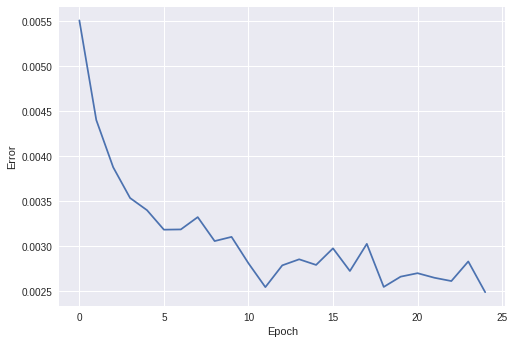

In [0]:
epochs = 25
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    err = sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_nb})
    print('Epoch {:.0f} :: Error={:.5f}'.format(i, err))
    errors.append(err)
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()